In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [86]:
## Nome dos paths onse estão salvos e vamos salvar os dados processados
PATH_FAIXA_ETARIAS = '../dados/faixa_etaria/' # Nome do path dos arquivos salvos
PATH_DADOS_PROCESSADOS = '../dados/e_sus_processados/' # Nome do path a salvar os arquivos
PATH_MUNICIPIOS = '../dados/processados/'
PATH_ESTADO = '../dados/municipios/'

FILES_ESTADOS = os.listdir(PATH_DADOS_PROCESSADOS)
FILENAME_FAIXA_ETARIAS = 'faixa_etaria_processada.csv'
FILENAME_MUNICIPIOS = 'municipios_processada.csv'
FILENAME_ESTADO = 'estados_processada.csv'

dfMunicipios = pd.read_csv(PATH_MUNICIPIOS + FILENAME_MUNICIPIOS, encoding='utf-8', delimiter=';')
dfFE = pd.read_csv(PATH_FAIXA_ETARIAS + FILENAME_FAIXA_ETARIAS, encoding='utf-8', delimiter=';')
dfEstado = pd.read_csv(PATH_ESTADO + FILENAME_ESTADO, encoding='utf-8', delimiter=';')

cols = ['dataNotificacao', 'sexo', 'idade', 'estado_normalizado', 'municipio_normalizado', 'extractDate', 'idadeTrunc']

dflist = []

for file in FILES_ESTADOS:
    dfLoad = pd.read_csv(PATH_DADOS_PROCESSADOS + file, encoding='utf-8', delimiter=';', compression='zip')
    dfLoad = dfLoad[[c for c in dfLoad.columns if c in cols]]
    dflist.append(dfLoad.copy())
    
    print(f'Lido csv {file}')

dfProc = pd.concat(dflist).dropna(how='any',axis=0)

Lido csv rr_sus_processados.csv
Lido csv ba_sus_processados.csv
Lido csv es_sus_processados.csv
Lido csv df_sus_processados.csv
Lido csv rj_sus_processados.csv
Lido csv ma_sus_processados.csv
Lido csv mg_sus_processados.csv
Lido csv sc_sus_processados.csv
Lido csv pe_sus_processados.csv
Lido csv ro_sus_processados.csv
Lido csv pi_sus_processados.csv
Lido csv se_sus_processados.csv
Lido csv go_sus_processados.csv
Lido csv rn_sus_processados.csv
Lido csv pr_sus_processados.csv
Lido csv pa_sus_processados.csv
Lido csv am_sus_processados.csv
Lido csv pb_sus_processados.csv
Lido csv al_sus_processados.csv
Lido csv ac_sus_processados.csv
Lido csv mt_sus_processados.csv
Lido csv ce_sus_processados.csv
Lido csv to_sus_processados.csv
Lido csv sp_sus_processados.csv
Lido csv rs_sus_processados.csv


In [87]:
dfProc.count()

dataNotificacao          5540139
sexo                     5540139
idade                    5540139
estado_normalizado       5540139
municipio_normalizado    5540139
extractDate              5540139
idadeTrunc               5540139
dtype: int64

A base com a populacao dividida em faixa etária é tratada para que numa mesma coluna fiquem o população total, segmentada pelo estado e pela faixa etária a qual pertencem

In [88]:
###################
# dfEstado
###################

cols_sel = ['uf', 
            'estado_normalizado']
dfEstado = dfEstado.reset_index()
dfEstado = dfEstado[cols_sel].set_index('uf')
dfEstado

,estado_normalizado
uf,
RO,rondonia
AC,acre
AM,amazonas
RR,roraima
PA,para
AP,amapa
TO,tocantins
MA,maranhao
PI,piaui


In [93]:
###################
# df Faixa Etária por estado
###################

dfFETab = (dfFE.set_index('idadeTrunc').T
    .reset_index()
    .rename(columns={'index': 'uf'})
    .set_index('uf')
    .stack()
)

dfFETab.name = 'populacao'
dfFETab = dfFETab.reset_index()
dfFETab['idadeTrunc'] = dfFETab['idadeTrunc'].astype(int) 
dfFETab = dfFETab.set_index(['uf'])
dfFETab = dfFETab.join(dfEstado, on = ['uf']).reset_index().set_index(['estado_normalizado', 'idadeTrunc'])
dfFETab

uf  populacao
estado_normalizado idadeTrunc               
acre               0           AC     167847
                   10          AC     182031
                   20          AC     163955
                   30          AC     136541
                   40          AC     104798
...                            ..        ...
tocantins          50          TO     150266
                   60          TO      95910
                   70          TO      51374
                   80          TO      20470
                   90          TO       3478

[270 rows x 2 columns]

In [94]:
###################
# df dos Municipios
###################

cols_sel = ['codigo_ibge', 
            'municipioNormalizado', 
            'codigo_uf', 
            'uf', 
            'estado', 
            'densidade_populacional', 
            'area_mun', 
            'populacao_estimada']
dfMunicipios = dfMunicipios[cols_sel].set_index('uf')

In [95]:
###################
# Cruzamento dos municipios com dfEstado para trazer densidade populacional por estado
###################
dfEstado = (dfMunicipios.join(dfEstado, on = ['uf'])
            .rename(columns= {'municipioNormalizado' : 'municipio_normalizado'})
            .reset_index().set_index(['estado_normalizado', 'municipio_normalizado'])
           )

In [109]:
dfEstado

,,uf,codigo_ibge,codigo_uf,estado,densidade_populacional,area_mun,populacao_estimada
estado_normalizado,municipio_normalizado,,,,,,,
goias,abadia de goias,GO,5200050,52,Goiás,60.832835,147.256,8958
minas gerais,abadia dos dourados,MG,3100104,31,Minas Gerais,7.951749,881.064,7006
goias,abadiania,GO,5200100,52,Goiás,19.577525,1045.127,20461
minas gerais,abaete,MG,3100203,31,Minas Gerais,12.795345,1817.067,23250
para,abaetetuba,PA,1500107,15,Pará,98.767456,1610.652,159080
...,...,...,...,...,...,...,...,...
bahia,xique-xique,BA,2933604,29,Bahia,9.158680,5079.662,46523
paraiba,zabele,PB,2517407,25,Paraíba,21.112058,106.811,2255
sao paulo,zacarias,SP,3557154,35,São Paulo,8.625445,319.056,2752


In [113]:
###################
# calcular com a densidade populacional por estado
###################

dfDensEstado = (dfEstado.groupby('estado_normalizado')[['area_mun', 'populacao_estimada']]
                .agg('sum')
)
dfDensEstado['densidade_populacional'] = dfDensEstado['populacao_estimada'] / dfDensEstado['area_mun']

dfDensEstado

,area_mun,populacao_estimada,densidade_populacional
estado_normalizado,,,
acre,164123.964,894470,5.449966
alagoas,27843.295,3351543,120.371637
amapa,142470.762,861773,6.048771
amazonas,1559167.889,4207714,2.698692
bahia,564760.427,14930634,26.437111
ceara,148894.441,9187103,61.702122
distrito federal,5760.783,3055149,530.335720
espirito santo,46074.447,4064052,88.206202
goias,340203.329,7113540,20.909672


In [97]:
###################
# Tratamento do df com os casos de Covid
###################

dfIdadeEstado = (dfProc[['extractDate', 'idadeTrunc', 'estado_normalizado', 'municipio_normalizado']].copy()
                 .reset_index(drop=True)
                 .set_index('estado_normalizado', 'municipio_normalizado'))

### Cruzamento dos dados com informações dos estados

O intuito desse cruzamento e a homogenização dos dados com a informação geográfica e nomeclatura dos estados. 

In [57]:
################################
# Agrupamento por Idade e Estado
################################

# dfGroupIdEstMun = (dfIdadeEstado
#          .groupby(['idadeTrunc', 'estado_normalizado', 'municipio_normalizado']).size()
#          .reset_index(name='soma_casos_covid')
#          .rename(columns={'extractDate': 'soma_casos_covid'})
#          .set_index(['estado_normalizado', 'municipio_normalizado'])
#         )

In [128]:
################################
# Agrupamento por Idade e Estado
################################
dfGroupIdEst = (dfIdadeEstado
         .groupby(['idadeTrunc', 'estado_normalizado']).size()
         .reset_index(name='soma_casos_covid')
         .rename(columns={'extractDate': 'soma_casos_covid'})
         .set_index(['estado_normalizado', 'idadeTrunc'])
        )

################################
# normalizando
################################
fact_norm = 1000
col_norm = f'norm_x{fact_norm}Hab'
dfFinalIdEst = dfGroupIdEst.merge(dfFETab, on = ['estado_normalizado', 'idadeTrunc'])
dfFinalIdEst['norm'] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao'])
dfFinalIdEst[col_norm] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao'])*fact_norm
dfFinalIdEst = dfFinalIdEst.dropna(how='any',axis=0)
dfFinalIdEst

,,soma_casos_covid,uf,populacao,norm,norm_x1000Hab
estado_normalizado,idadeTrunc,,,,,
acre,0,939,AC,167847,0.005594,5.594381
alagoas,0,2352,AL,512924,0.004585,4.585475
amazonas,0,6960,AM,810784,0.008584,8.584284
bahia,0,14894,BA,2057896,0.007237,7.237489
ceara,0,10089,CE,1300206,0.007760,7.759540
...,...,...,...,...,...,...
rio de janeiro,90,1273,RJ,91599,0.013898,13.897532
rio grande do norte,90,299,RN,14525,0.020585,20.585198
rio grande do sul,90,671,RS,61998,0.010823,10.822930


In [140]:
dfFinalIdEst = (dfFinalIdEst.groupby(['estado_normalizado'])[[col_norm]].agg('sum'))
# dfFinalIdEst
dfIdEsFinal = (dfFinalIdEst.join(dfDensEstado, on=['estado_normalizado']))



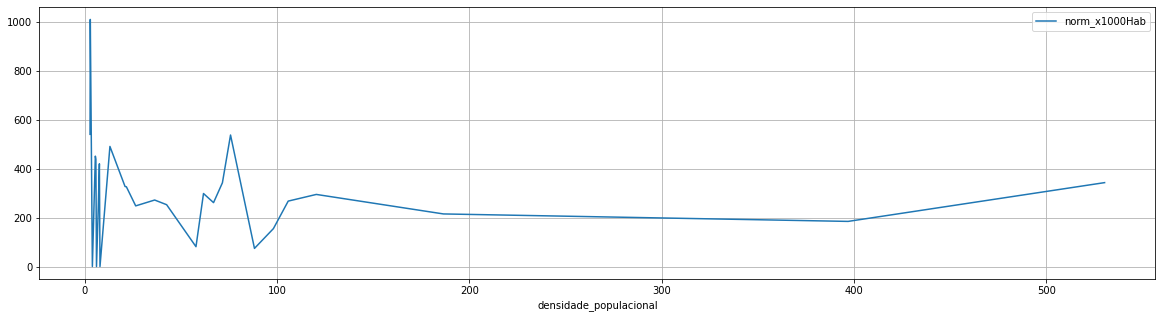

In [141]:
x_column = 'densidade_populacional'
dfIdEsFinal.sort_values(x_column).plot(x = x_column, y=col_norm, figsize=(20,5))
plt.grid()

In [142]:
dfIdEsFinal.corr()

,norm_x1000Hab,area_mun,populacao_estimada,densidade_populacional
norm_x1000Hab,1.000000,0.037837,-0.203755,-0.106941
area_mun,0.037837,1.000000,0.045205,-0.370022
populacao_estimada,-0.203755,0.045205,1.000000,0.247830
densidade_populacional,-0.106941,-0.370022,0.247830,1.000000


In [125]:
# dfFinalIdEst.join(dfDensEstado, on=['estado_normalizado']).sort_values('densidade_populacional')

,norm_x1000Hab,area_mun,populacao_estimada,densidade_populacional
estado_normalizado,,,,
amazonas,540.164119,1559167.889,4207714,2.698692
roraima,1009.288423,223644.527,631181,2.822251
mato grosso,0.305895,903207.019,3526220,3.904110
acre,450.960257,164123.964,894470,5.449966
tocantins,438.437008,277466.763,1590248,5.731310
amapa,0.130102,142470.762,861773,6.048771
para,243.238387,1245870.798,8690745,6.975639
rondonia,419.658035,237765.240,1796460,7.555604
mato grosso do sul,0.267400,357145.534,2809394,7.866244


In [126]:
dfIdEst = dfIdadeEstado.join(dfEstado, on = ['estado_normalizado'])
dfIdEst = dfIdEst[(dfIdEst['extractDate'] < '2020-12-31')]

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [ ]:
################################
# Agrupamento por Idade e Estado
################################

dfGroupIdEst = (dfIdEst[['idadeTrunc', 'extractDate', 'uf']]
         .groupby(['idadeTrunc', 'uf']).size()
         .reset_index(name='soma_casos_covid')
         .set_index(['idadeTrunc', 'uf'])
        )

Agrupamento dos casos de Covid-19 por estado e faixa estária

In [17]:
################################
# Agrupamento por Idade e Estado
################################

dfGroupIdEst = (dfIdEst[['idadeTrunc', 'extractDate', 'uf']]
         .groupby(['idadeTrunc', 'uf']).agg('count')
         .reset_index()
         .rename(columns={'extractDate': 'soma_casos_covid'})
         .set_index(['idadeTrunc', 'uf'])
        )

################################
# Normalização do total de casos com a população do usuário
################################

dfFinalIdEst = dfGroupIdEst.join(dfFETab, on = ['idadeTrunc', 'uf'])
dfFinalIdEst['norm'] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao'])
dfFinalIdEst['norm_x1000Hab'] = dfFinalIdEst['soma_casos_covid'].div(dfFinalIdEst['populacao'])*1000
dfFinalIdEst.dropna(how='any',axis=0)

NameError: name 'dfIdEst' is not defined

Probabilidade de ter COVID pertencendo a certa Faixa Etária

In [ ]:
# dfProb = dfProc.groupby('idadeTrunc')
# dfProb = (dfProc[['idadeTrunc', 'extractDate']].groupby('idadeTrunc').agg('count')
#           .reset_index().rename(columns={'extractDate': 'soma'}))

# dfProb['Probabilidade_covid_and_idade'] = dfProb['soma'].div(dfProb['soma'].sum())
# dfProb['idadeTrunc'] = dfProb['idadeTrunc'].astype(int)
# dfProb = dfProb.set_index('idadeTrunc')

In [ ]:
# dfFESum = dfFE[['idadeTrunc', 'SP']].copy()
# dfSum['idadeTrunc'] = dfSum['idadeTrunc'].astype(int)
# dfSum['Probabilidade_idade'] = (dfSum['SP'] / dfSum['SP'].sum())
# dfSum = dfSum.set_index('idadeTrunc')

In [ ]:
# dfFinal = dfProb.join(dfSum, on=['idadeTrunc'], rsuffix = '_sum', how='outer')
# dfFinal['Probabilidade_covid_dada_idade'] = dfFinal['Probabilidade_covid_and_idade'].div(dfFinal['Probabilidade_idade'])
# dfFinal['norm'] = dfFinal['soma'].div(dfFinal['SP'])
# dfFinal['norm_x1000Hab'] = dfFinal['soma'].div(dfFinal['SP'])*1000
# dfFinal

In [ ]:
# dfTeste = dfFinal[['Probabilidade_idade']]
# dfTeste.plot(kind='bar', stacked=True, rot=0)

In [ ]:
################################
# Agrupamento por Idade, Data do caso e estado
################################

fator_norm = 1000000
col_norm = 'norm_x' + str(fator_norm) +'Hab'


dfGroupIdEstData = (dfIdEst[['idadeTrunc', 'extractDate', 'uf']]
         .groupby(['idadeTrunc', 'extractDate', 'uf']).size()
         .reset_index(name='soma_casos_covid')
         .set_index(['idadeTrunc', 'uf'])
        )

dfGroupIdEstData
################################
# Normalização do total de casos com a população do usuário
################################

dfFinalIdEstData = dfGroupIdEstData.join(dfFETab, on = ['idadeTrunc', 'uf'])
dfFinalIdEstData['norm'] = dfFinalIdEstData['soma_casos_covid'].div(dfFinalIdEstData['populacao'])
dfFinalIdEstData[col_norm] = dfFinalIdEstData['soma_casos_covid'].div(dfFinalIdEstData['populacao'])*fator_norm
dfFinalIdEstData = dfFinalIdEstData.dropna(how='any',axis=0)
dfFinalIdEstData = dfFinalIdEstData[(dfFinalIdEstData[col_norm] < 0.05*fator_norm)]

In [ ]:
# dfPorDia = dfProc.groupby(['extractDate', 'idadeTrunc']).size().reset_index(name='counts')
# dfPorDia = dfPorDia.join(dfSum, on=['idadeTrunc'], rsuffix = '_sum', how='outer')

# dfPorDia['norm_x100000Hab'] = dfPorDia['counts'].div(dfPorDia['SP'])*1000000
# dfPorDia = dfPorDia[['extractDate', 'idadeTrunc', 'norm_x100000Hab']]

In [ ]:
dffinal = pd.pivot_table(dfFinalIdEstData, values=col_norm, index=['extractDate'],
                    columns=['idadeTrunc'], aggfunc=np.sum, fill_value=0)
dffinal.plot(kind='line',figsize=(20,5))
plt.grid()

In [ ]:
dffinal_acu = dffinal.sort_values(by = ['extractDate'])
dffinal_acu.cumsum().plot(logy = True,figsize=(20,20))
plt.grid()

In [ ]:
dffinal_acu.cumsum().plot(logy = True,figsize=(20,20))
plt.grid()

In [ ]:
dfFinalIdEstData[(dfFinalIdEstData['norm_x1000000Hab'] < 20000.0)]

Classificação por casos de Covid e Faixa etária 

Eixo Y Numero Total de casos normalizados, 
Eixo X Densidade Populacional
Pontinho classificador pela cor -> Casos de Covid por faixa

===============================================================

Modelo regresional

Densidade populacional eixo X
Numero de casos Y

Segmentação por Idade. mostrar um gráfico por idade